### 1. McCulloch-Pitts neuron

In [1]:
#import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#create a fucntion for the neuron behavior 
def neuron(W,X):
    """W - numpy array with weights values, X - numpy array with input values"""       
    #insert the threshold as the first input    
    X = np.insert(X, 0, -1)
    #returns the result of the sign function
    return np.sign(W.T.dot(X))

In [2]:
#if the neuron performes the logical AND, this will mean that the neuron should return 1 only the cases
#where both of the binary inputs are 1, and in our case should return -1, which is the result
#to prove it we can plug all the possible combinations of binary inputs (1,1), (1,-1), (-1,-1) and (-1,1)

w = np.array([3, 2, 2])

x = np.array([1,1])
print("(1,1), y =", neuron(w,x))

x = np.array([1,-1])
print("(1,-1), y =", neuron(w,x))

x = np.array([-1,-1])
print("(-1,-1), y =", neuron(w,x))


x = np.array([-1,1])
print("(-1,1), y =", neuron(w,x))


(1,1), y = 1
(1,-1), y = -1
(-1,-1), y = -1
(-1,1), y = -1


### 2. Activation functions

#### Sigmoid function:

In [3]:
#inilializing variables for the parameter a and points x for plotting a function
a = np.array([0.5,1,2])
x_points = np.linspace(-10, 10, 101)

In [4]:
#implimenting the Sigmoid function
def sigmoid(a,x):
    return (2/(1+np.exp(-a*x))-1)

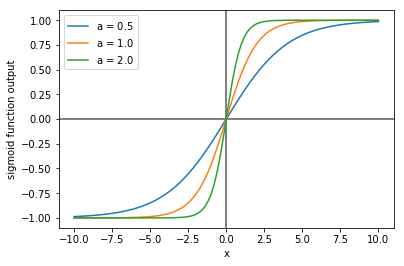

In [5]:
#plot the Sigmoid function with different values of a
for i in a:
    y = np.empty(shape=(0))
    y = np.append(y,sigmoid(i,x_points)) 
    plt.xlabel('x')
    plt.ylabel('sigmoid function output')
    plt.axhline(0, color="grey")
    plt.axvline(0, color="grey")
    plt.plot(x_points, y, label="a = ${}$".format(i))

plt.legend()
plt.show()


#### Hyperbolic tangent function:

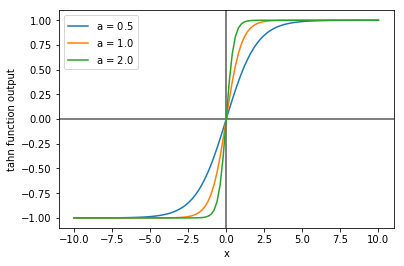

In [6]:
#implimenting the Hyperbolic tangent function - there is built-in function numpy.tanh() 
#plot the tanh function with different values of a
for i in a:
    y = np.empty(shape=(0))
    y = np.append(y,np.tanh(i*x_points)) 
    plt.xlabel('x')
    plt.ylabel('tahn function output')
    plt.axhline(0, color="grey")
    plt.axvline(0, color="grey")
    plt.plot(x_points, y, label="a = ${}$".format(i))

plt.legend()
plt.show()

#### Piecewise linear function:

In [7]:
#implimenting piecewise function
def piecewise(a,x):
    if x >= 1/a:
        y = 1
    elif x > -1/a and x < 1/a:
        y = a*x
    else:
        y = -1
        
    return y  


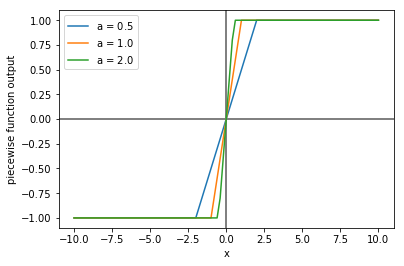

In [8]:
#plot the piecewise function with different values of a
for i in a:
    y = np.empty(shape=(0))
    
    for x in x_points:
        y = np.append(y,piecewise(i,x))
        
    plt.xlabel('x')
    plt.ylabel('piecewise function output')
    plt.axhline(0, color="grey")
    plt.axvline(0, color="grey")
    plt.plot(x_points, y, label="a = ${}$".format(i))

plt.legend()
plt.show()

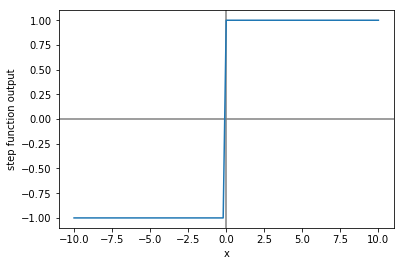

In [9]:
#step function
def step(x):
    if x >= 0:
        return 1
    else:
        return -1
y = np.empty(shape=(0))
for x in x_points: 
    y = np.append(y,step(x))
    
plt.xlabel('x')
plt.ylabel('step function output')
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.plot(x_points, y)

plt.show()

The parameter a defines how steep the slope of the function is. The larger the value of a, the steeper the slope. The step function could be obtain when the parameter a goes to infitiny.

### 3. Rosenblatt’s perceptron

#### Training set

In [10]:
#prepare the input vector
xi = np.random.randn(1000,2) # Standard normal distribution
xi = np.insert(xi, 0, -1, axis=1)

#define the function for the comparison of xi,1 and xi,2
def compare(x):
    if x[2] >= 0.5-x[1]:
        return 1
    else:
        return -1
    
#the expected output of the training set applied to the input array along the columns axis,
#e.i. applied to each row
dx = np.apply_along_axis(compare, 1, xi)

#the McCulloch-Pitts neuron output from ex.1
def neuron(W,X):
    """W - numpy array with weights values, X - numpy array with input values"""       
    #insert the threshold as the first input    
    X = np.insert(X, 0, -1)
    #returns the result of the sign function
    return np.sign(W.T.dot(X))

In [11]:
def train(X, DX, eta=1):
    w = np.random.randn(len(X[0]))
    eta = eta
    
    for epoch in range(1000):
        for i, x in enumerate(X):
                if DX[i] != np.sign(w.T.dot(x)):
                    w1 = w + eta*(DX[i]-np.sign(w.T.dot(x)))*X[i]
                
        if np.array_equal(w,w1):
            return w
            #return "The weights are {} after {}".format(w,epoch)
            break      
        else:
            w = w1
    
    return "Don't converge - accept that it will not converge or try more epochs or different eta"
    
weights = train(xi, dx, 0.005)
print(weights)


[ 0.44288082  0.88767502  0.88409591]


The value of eta should be positive, but preferably cosiderably less than 1. If it is very small number, then it will take a lot of epochs to calculatr the correct weights. If the value is big, then the local minimum might be missed and the step will jump between back and forth over it.

In [12]:
#validate with new training set
x_test = np.random.randn(500,2) # Standard normal distribution
x_test = np.insert(x_test, 0, -1, axis=1)
dx_test = np.apply_along_axis(compare, 1, x_test)

#check whether the results with the newly calculated weights applied to
#the inputs of the test set
#are the same as the desired values from the test set
result = np.empty(shape=(0))
for i, x in enumerate(x_test):
    np.append(result,dx_test[i] == np.sign(weights.T.dot(x)))

print(np.all(result))

True


All of the values are the same, that means that we thought the neuron successfully to find the weights.

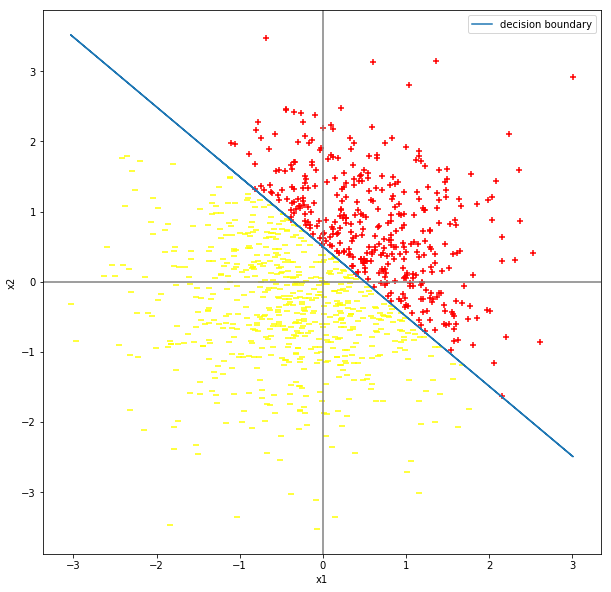

In [13]:
plt.figure(figsize=(10,10))
for i, x in enumerate(xi):
    # Plot the negative samples
    if dx[i] < 0:  
        plt.scatter(x[1], x[2],marker='_', c="yellow")
    # Plot the positive samples
    else:
        plt.scatter(x[1], x[2], marker='+', c='red')
        
#to plot the decision boundary we should solve 
#the equation w0x(i,0) + w1x(i,1) + w2x(i,2) = 0, where x(i,0)=-1 and x(i,1)=x and x(i,2)=y
#thus -w0+w1x+w2y=0
#x = (w0 - w2y)/w1, x=0, when y = w0/w2
#y = (w0 - w1x)/w2, y=0, when x = w0/w1

db_x = [0,weights[0]/weights[2]]
db_y = [weights[0]/weights[1],0]
slope = (db_y[1]-db_y[0])/(db_x[1]-db_x[0])

x_line = xi[:,1]
y_line = slope*x_line + db_x[1]



plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_line, y_line, label="decision boundary")
plt.legend()

The weights vector is optiomal in the sense that it is orthogonal to the decision boundary.

### 4. Linear separability

In [14]:
#prepare the training set
X_xor = np.array([[0, 0],
                [0, 1],
                [1, 0], 
                [1, 1]])
X_xor = np.insert(X_xor, 0, -1, axis=1)
Y_xor = np.array([0, 1, 1, 0])

print(train(X_xor, Y_xor, 0.5))
print(train(X_xor, Y_xor, 0.05))
print(train(X_xor, Y_xor, 0.005))

Don't converge - accept that it will not converge or try more epochs or different eta
Don't converge - accept that it will not converge or try more epochs or different eta
Don't converge - accept that it will not converge or try more epochs or different eta


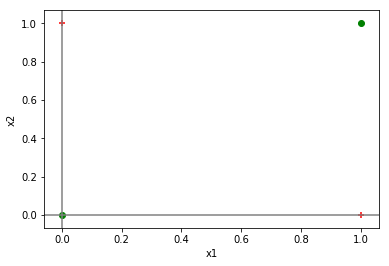

In [15]:
for i, x in enumerate(X_xor):
    # Plot the negative samples
    if Y_xor[i] <= 0: 
        
        plt.scatter(x[1], x[2], marker='o', c="green")
    # Plot the positive samples
    else:
        plt.scatter(x[1], x[2], marker='+', c='red')
        
plt.axhline(0, color="grey")
plt.axvline(0, color="grey")
plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()